### Решение уравнения Пуассона методом Галеркина
Решения ДУ 
    $$ \Delta \phi(x) = -4 \pi \rho(x) $$
сводится к решению системы алгебраический линейных уравнений
    $$ \textbf{A}\vec{a} = \vec{b} $$
где элементы матрицы $\textbf{A}$ определяются базисными функциями

Для того чтобы избежать нахождения обратной матрциы $\textbf{A}$ она представляется в виде
    $$ \textbf{A} = \textbf{L} \textbf{U} $$

Тогда решение для решения изначальной системы линейных уравнений решатеся уравнение 
    $$ \textbf{L} \vec{y} = \vec{b} $$
а затем
    $$ \textbf{U} \vec{a} = \vec{y} $$

#### Таким образом, для решения задачи следует
##### 1. Найти вектор $\vec{b}$
##### 2. Найти матрицу $\textbf{A}$
##### 3. Решить систему $ \textbf{L} \vec{y} = \vec{b} $
##### 4. Решить систему $ \textbf{U} \vec{a} = \vec{y} $

In [1]:
from math import pi
from tqdm import tqdm
import matplotlib.pylab as plt

#### Элементы вектора $\vec{b}$ определяется как
$$ b_i = \int_{1}^{0} \rho(x) w_i(x) dx$$
где $w_i(x)$ - базисные функции

In [2]:
def b_element(i, x, h):
    boundIndex = len(x)/2
    if i==0 or i==boundIndex*2:
        return 0
    else:
        if i < boundIndex:
            a1 = (x[i+1]**4 + x[i-1]**4) / (12*h)
            a2 = - (x[i]**3 * (x[i+1] + x[i-1])) / (3*h)
            a3 = x[i]**4 / (2*h)
            return 4*pi*(a1+a2+a3)
        else:
            a1 = (x[i-1] - x[i])**2 * (6 + x[i-1]**2 + 2*x[i-1]*(-2 + x[i]) - 8*x[i] + 3*x[i]**2) / (12*h)
            a2 = (x[i] - x[i+1])**2 * (6 + x[i]**2 + 2*x[i]*(-4 + x[i+1]) - 4*x[i+1] + x[i+1]**2) / (12*h)
            return 4*pi*(a1+a2)

#### Нахождение решения линейного уравнения $ \textbf{L} \vec{y} = \vec{b} $

In [3]:
def evaluate_L_lineqsys(x, h):
    y = list()
    u = list()
    w = list()
    w.append(2.0 / h)
    y.append(b_element(0, x, h)/w[-1])
    for i in xrange(len(x)-1):
        # new values are now old
        u.append((- 1 / (h*w[-1]))) 
        w.append((2.0 / h) + (1.0 / h) * u[-1])
        y.append((b_element(i, x, h) + (1.0 / h) * y[-1])/w[-1])
    return [y, u, w]

#### Нахождение решения линейного уравнения $ \textbf{U} \vec{a} = \vec{y} $

In [4]:
def evaluate_U_lineqsys(y, u):
    a = list()
    a.append(y[-1])
    for i in xrange(len(y)-1):
        a.append(y[-i] - u[-i]*a[-1])
    a = list(reversed(a))
    return a

In [5]:
h = 0.0001
x = [i*h for i in range(0, int(1/h))]

In [6]:
y, u, w = evaluate_L_lineqsys(x, h)

In [7]:
a = evaluate_U_lineqsys(y, u)

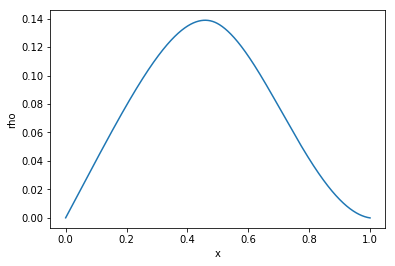

In [8]:
plt.plot(x, a)
plt.xlabel('x')
plt.ylabel('rho')
plt.show()